# Nucleus
Nuclei were detected by the color of hematoxylin stain.

In [1]:
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
DIRECTORY = '/home/jrm/Adjeroh/Naved/Process100.all/'
FILE = 'Process100_Nucleus.csv'

In [3]:
object_df = pd.read_csv(DIRECTORY+FILE)
for col in object_df.columns:
    print(col)

ImageNumber
ObjectNumber
AreaShape_Area
AreaShape_BoundingBoxArea
AreaShape_BoundingBoxMaximum_X
AreaShape_BoundingBoxMaximum_Y
AreaShape_BoundingBoxMinimum_X
AreaShape_BoundingBoxMinimum_Y
AreaShape_Center_X
AreaShape_Center_Y
AreaShape_CentralMoment_0_0
AreaShape_CentralMoment_0_1
AreaShape_CentralMoment_0_2
AreaShape_CentralMoment_0_3
AreaShape_CentralMoment_1_0
AreaShape_CentralMoment_1_1
AreaShape_CentralMoment_1_2
AreaShape_CentralMoment_1_3
AreaShape_CentralMoment_2_0
AreaShape_CentralMoment_2_1
AreaShape_CentralMoment_2_2
AreaShape_CentralMoment_2_3
AreaShape_Compactness
AreaShape_ConvexArea
AreaShape_Eccentricity
AreaShape_EquivalentDiameter
AreaShape_EulerNumber
AreaShape_Extent
AreaShape_FormFactor
AreaShape_HuMoment_0
AreaShape_HuMoment_1
AreaShape_HuMoment_2
AreaShape_HuMoment_3
AreaShape_HuMoment_4
AreaShape_HuMoment_5
AreaShape_HuMoment_6
AreaShape_InertiaTensorEigenvalues_0
AreaShape_InertiaTensorEigenvalues_1
AreaShape_InertiaTensor_0_0
AreaShape_InertiaTensor_0_1
Area

In [4]:
object_df.describe()

,ImageNumber,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,...,Texture_Variance_Hematoxylin_4_02_256,Texture_Variance_Hematoxylin_4_03_256,Texture_Variance_Hematoxylin_5_00_256,Texture_Variance_Hematoxylin_5_01_256,Texture_Variance_Hematoxylin_5_02_256,Texture_Variance_Hematoxylin_5_03_256,Texture_Variance_Hematoxylin_7_00_256,Texture_Variance_Hematoxylin_7_01_256,Texture_Variance_Hematoxylin_7_02_256,Texture_Variance_Hematoxylin_7_03_256
count,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,...,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000
mean,332.492319,14.146602,523.516697,826.516196,164.595926,162.774002,136.447988,134.868342,150.013748,148.307180,...,929.233644,953.638527,942.136721,967.952110,942.089111,973.341614,966.032399,983.409566,964.853120,988.379111
std,191.042413,10.623356,304.497711,532.111932,87.100368,87.617269,87.203650,87.532074,87.259483,87.687349,...,624.432430,652.120365,640.231866,673.335091,640.823983,677.495297,677.114500,703.706013,675.373390,708.810857
min,1.000000,1.000000,177.000000,208.000000,8.000000,7.000000,0.000000,0.000000,2.755000,2.333333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,150.000000,6.000000,299.000000,450.000000,90.000000,87.000000,61.000000,58.000000,75.160327,72.301991,...,525.904117,533.791228,529.139126,536.091049,528.859732,538.203084,532.460148,536.150440,532.889076,538.455852
50%,362.000000,12.000000,444.000000,684.000000,166.000000,164.000000,138.000000,135.000000,151.384459,149.096585,...,778.442988,792.891788,786.862043,799.959783,786.528952,802.750243,799.812357,807.000956,800.967615,813.285976
75%,521.000000,20.000000,661.000000,1040.000000,240.000000,240.000000,211.000000,211.000000,225.256552,224.436799,...,1137.276487,1163.017919,1148.226682,1186.369900,1150.854411,1190.319791,1179.454758,1207.006016,1178.687993,1209.582787
max,600.000000,54.000000,2882.000000,6059.000000,300.000000,300.000000,292.000000,293.000000,296.355140,296.596059,...,6102.481233,5980.225847,6252.637784,6622.486615,6391.851246,5899.618416,6492.630828,6900.052777,6222.088586,7313.803583


In [5]:
patch_max=object_df.groupby(['ImageNumber']).max()
patch_max.describe()
# We have nuclei counts for all 600 patch files.

,ObjectNumber,AreaShape_Area,AreaShape_BoundingBoxArea,AreaShape_BoundingBoxMaximum_X,AreaShape_BoundingBoxMaximum_Y,AreaShape_BoundingBoxMinimum_X,AreaShape_BoundingBoxMinimum_Y,AreaShape_Center_X,AreaShape_Center_Y,AreaShape_CentralMoment_0_0,...,Texture_Variance_Hematoxylin_4_02_256,Texture_Variance_Hematoxylin_4_03_256,Texture_Variance_Hematoxylin_5_00_256,Texture_Variance_Hematoxylin_5_01_256,Texture_Variance_Hematoxylin_5_02_256,Texture_Variance_Hematoxylin_5_03_256,Texture_Variance_Hematoxylin_7_00_256,Texture_Variance_Hematoxylin_7_01_256,Texture_Variance_Hematoxylin_7_02_256,Texture_Variance_Hematoxylin_7_03_256
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,19.963333,1130.721667,1933.145000,284.973333,280.140000,262.241667,257.713333,273.766693,269.025526,1130.721667,...,1880.961917,1953.884321,1923.764843,1999.080560,1918.585056,2017.561646,2009.695241,2104.444436,1998.680353,2111.364775
std,12.106731,437.004855,855.199876,36.795368,43.896719,39.921960,46.982515,38.584869,45.626657,437.004855,...,912.072816,970.208313,957.045033,1003.975874,941.381042,1014.777540,1030.707829,1067.953486,991.630146,1070.528398
min,1.000000,313.000000,500.000000,20.000000,28.000000,0.000000,6.000000,7.765873,18.132308,313.000000,...,328.984933,332.436338,312.274281,326.242830,327.576440,343.654295,331.897711,379.283962,320.902454,308.782867
25%,10.000000,822.250000,1305.000000,291.000000,282.000000,261.000000,254.000000,275.713799,268.302962,822.250000,...,1290.275567,1321.201103,1304.104994,1338.728580,1304.213938,1337.578929,1350.307345,1378.065911,1353.313329,1399.001616
50%,18.000000,1063.000000,1800.000000,300.000000,300.000000,276.000000,275.000000,288.417572,287.294271,1063.000000,...,1655.500477,1693.362117,1671.732465,1743.562900,1673.533808,1728.147483,1738.457807,1831.922282,1730.756425,1816.058601
75%,27.000000,1355.250000,2347.000000,300.000000,300.000000,283.000000,284.000000,292.638683,292.357318,1355.250000,...,2249.334946,2378.110433,2319.748828,2390.748320,2303.424549,2421.939163,2420.484074,2515.804334,2389.883593,2499.259058
max,54.000000,2882.000000,6059.000000,300.000000,300.000000,292.000000,293.000000,296.355140,296.596059,2882.000000,...,6102.481233,5980.225847,6252.637784,6622.486615,6391.851246,5899.618416,6492.630828,6900.052777,6222.088586,7313.803583


In [6]:
#nucleus_count=object_df['ImageNumber','ObjectNumber'].groupby(['ImageNumber']).count()
basics=object_df[ ['ImageNumber','ObjectNumber'] ]
nucleus_count=basics.groupby(['ImageNumber']).count()
DECILES=[x/10 for x in range(1,10,1)]
nucleus_count.describe(percentiles=DECILES)
# Here is the distribution of nuclei per patch

,ObjectNumber
count,600.000000
mean,19.963333
std,12.106731
min,1.000000
10%,6.000000
20%,9.000000
30%,12.000000
40%,15.000000
50%,18.000000
60%,21.000000


array([[<AxesSubplot:title={'center':'ObjectNumber'}>]], dtype=object)

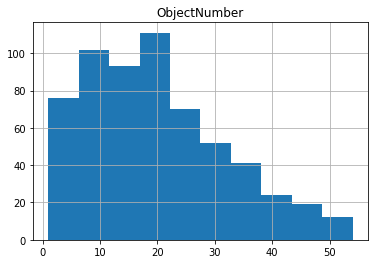

In [7]:
# patch_max['ObjectNumber'].value_counts()    # how to interpret?
pd.DataFrame.hist(nucleus_count)
# Here is a visual on the distribution of nuclei per patch.
# There are no patches with zero nuclei. 
# There are a few patches with 50 or more nuclei (wow! we should have a look).
# The mode is 20 nuclei per patch, higher than I thought.

In [8]:
good_cols=['ImageNumber','AreaShape_Area','AreaShape_Perimeter']
good_df = object_df[good_cols]
good_df.describe()
# The range of four features over all nuclei.

,ImageNumber,AreaShape_Area,AreaShape_Perimeter
count,11978.000000,11978.000000,11978.000000
mean,332.492319,523.516697,92.908685
std,191.042413,304.497711,30.203259
min,1.000000,177.000000,46.627417
25%,150.000000,299.000000,70.426407
50%,362.000000,444.000000,87.012193
75%,521.000000,661.000000,108.911688
max,600.000000,2882.000000,289.977705


array([[<AxesSubplot:title={'center':'ImageNumber'}>,
        <AxesSubplot:title={'center':'AreaShape_Area'}>],
       [<AxesSubplot:title={'center':'AreaShape_Perimeter'}>,
        <AxesSubplot:>]], dtype=object)

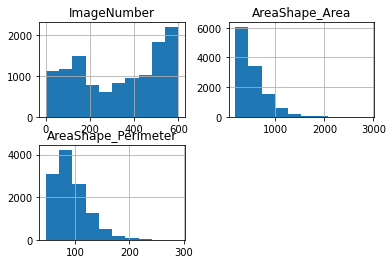

In [9]:
pd.DataFrame.hist(good_df)
# This is not clustering into multiple separable populations.

In [10]:
good_df.groupby(['ImageNumber']).describe()

AreaShape_Area                                                \
                     count        mean         std    min     25%    50%   
ImageNumber                                                                
1                      1.0  313.000000         NaN  313.0  313.00  313.0   
2                      3.0  251.000000   79.680612  178.0  208.50  239.0   
3                      5.0  302.000000  162.260593  182.0  212.00  260.0   
4                     29.0  314.137931  125.210030  177.0  233.00  262.0   
5                     32.0  355.937500  160.779339  180.0  243.00  331.0   
...                    ...         ...         ...    ...     ...    ...   
596                   47.0  574.255319  290.847448  177.0  305.50  534.0   
597                    5.0  667.600000  270.346629  280.0  513.00  734.0   
598                   50.0  549.580000  293.608798  181.0  347.00  440.0   
599                   12.0  549.333333  237.054782  244.0  399.25  516.5   
600                   13.0  647.769231  347.103048  221.0  334.00  599.0   

                            AreaShape_Perimeter                         \
                75%     max               count        mean        std   
ImageNumber                                                              
1            313.00   313.0                 1.0   70.769553        NaN   
2            287.50   336.0                 3.0   73.617605   3.011522   
3            271.00   585.0                 5.0   64.381328  14.108837   
4            340.00   635.0                29.0   72.757720  22.224713   
5            375.25   832.0                32.0   76.671742  21.685180   
...             ...     ...                 ...         ...        ...   
596          746.00  1323.0                47.0   99.384287  32.941174   
597          888.00   923.0                 5.0  117.583975  30.212404   
598          728.75  1565.0                50.0   94.032235  29.606939   
599          670.50  1000.0                12.0  109.057293  41.943306   
600          807.00  1314.0                13.0  110.467019  40.540477   

                                                                        
                   min         25%         50%         75%         max  
ImageNumber                                                             
1            70.769553   70.769553   70.769553   70.769553   70.769553  
2            70.284271   72.355339   74.426407   75.284271   76.142136  
3            52.041631   58.870058   59.941125   62.384776   88.669048  
4            48.041631   58.769553   66.526912   73.012193  147.539105  
5            49.455844   61.334524   72.769553   82.694174  131.840620  
...                ...         ...         ...         ...         ...  
596          58.284271   76.840620   90.183766  115.175144  181.681241  
597          72.870058  102.769553  127.195959  135.681241  149.403066  
598          48.384776   72.355339   89.565494  111.361436  188.095454  
599          65.012193   79.851028  103.260931  113.621843  205.279221  
600          62.384776   78.769553  101.012193  126.225397  203.959415  

[600 rows x 16 columns]

## Analysis
There are 20 nuclei per patch (mode), so statistics are justified.

The count, area, and perimeter of nuclei seem to be unimodal.
If these data were bimodal, it would suggest easy clustering & possible classification.
We're not so lucky.

The table above describes every patch in its own row.
Every patch is described by the distributions for two measures of its nuclei: area and perimeter.
Standard deviation and quartiles are shown but deciles or any other binning strategy can be used.